## MULTIPLE LINEAR REGRESSION

#### An index price is a statistical tool that measures how prices change over time, location, or other characteristics. It's used to track inflation and measure the purchasing power of a currency

In [49]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv('economic_index.csv')

In [51]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [52]:
##droping unnecessary columns
df.drop(columns = ['Unnamed: 0','year','month'], axis = 1, inplace = True)

In [53]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


#### the inplace=True parameter in the drop() function of Pandas means that the operation (dropping a specified row or column) will directly modify the DataFrame itself, without creating a copy.

In [54]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [55]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

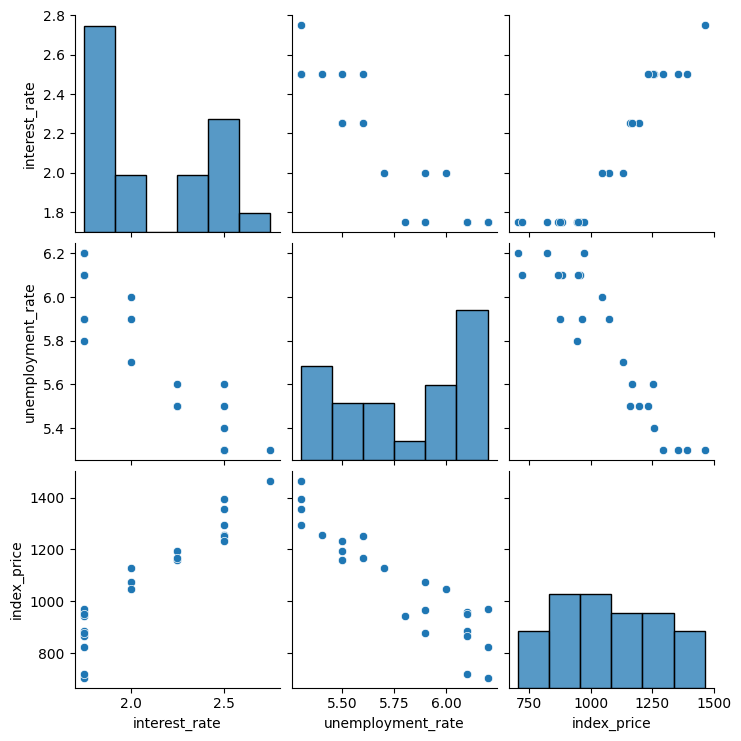

In [56]:
## visualiszation
sns.pairplot(df)

In [57]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

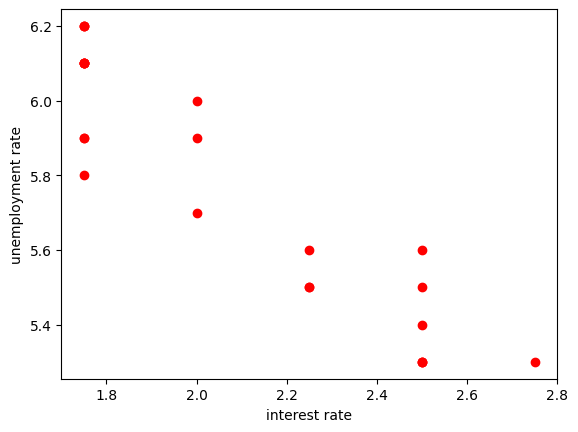

In [58]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color = 'red')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

In [59]:
## get independent and dependent features
#X = df[['interest_rate', 'unemployment_rate']] #method-1
X = df.iloc[:,:-1]  #method-2 (all rows, all columns except the last one)
y = df.iloc[:,-1]

In [60]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [61]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [62]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25, random_state=42)

In [63]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

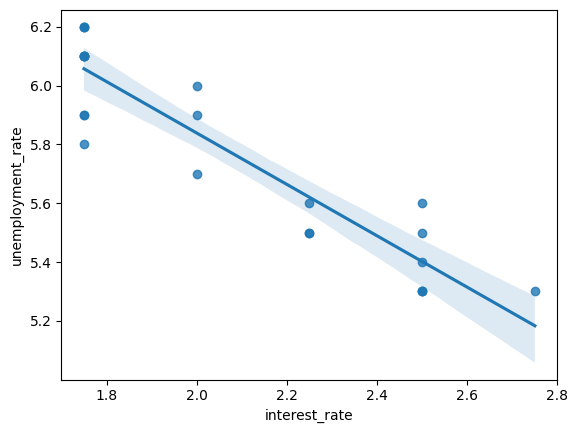

In [64]:
sns.regplot(x = df['interest_rate'] , y = df['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

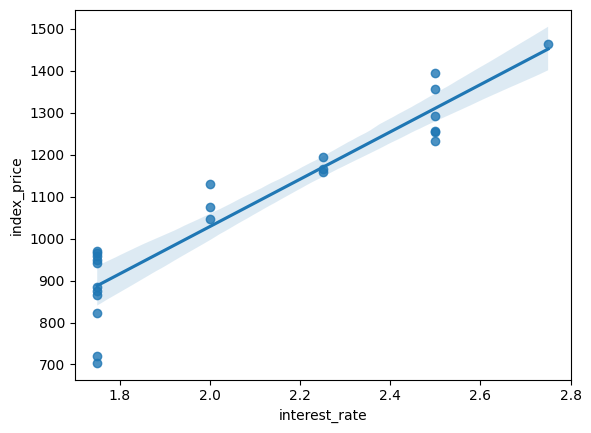

In [65]:
sns.regplot(x = df['interest_rate'] , y = df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

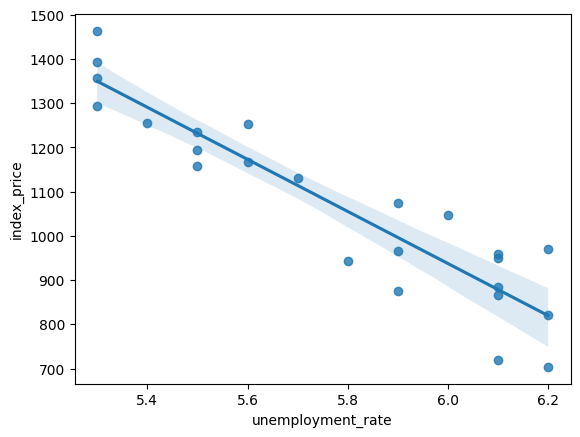

In [66]:
sns.regplot(x = df['unemployment_rate'] , y = df['index_price'])

In [67]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [68]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [69]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [70]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [71]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(estimator = regression,X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 3)

In [72]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [84]:
#prediction
y_pred = regression.predict(X_test)
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443


In [74]:
#PERFORMANCE METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

5793.7628877125835 59.9357815232356 76.11677139574815


In [75]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.8278978091457141


In [76]:
#ADJUSTED R SQUARE
1 - ((1 - score) * (len(y_test)-1)) / (len(y_test) - X_test.shape[1] - 1)

0.7131630152428567

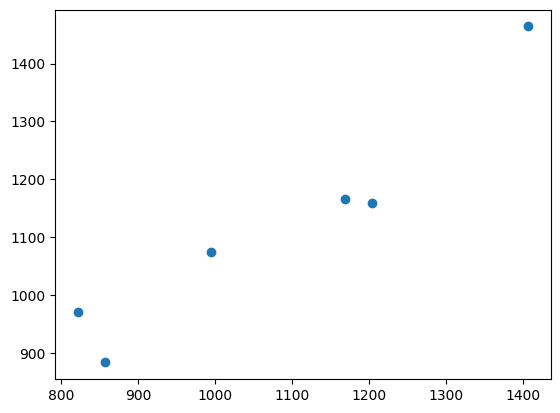

In [78]:
# ASSUMPTIONS
plt.scatter(y_pred,y_test)    #linear relationship b/w them means that the model has performed well

In [79]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


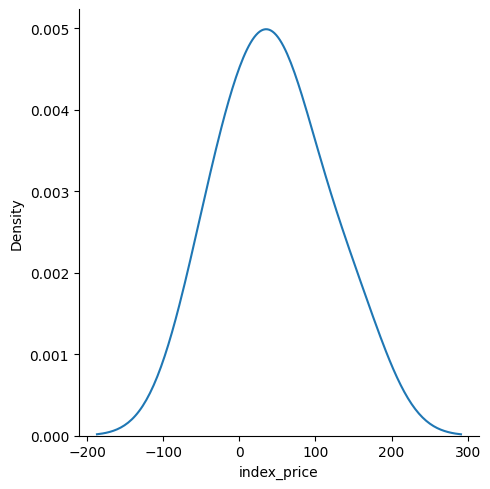

In [80]:
# ploting the residuals
sns.displot(residuals, kind = 'kde')

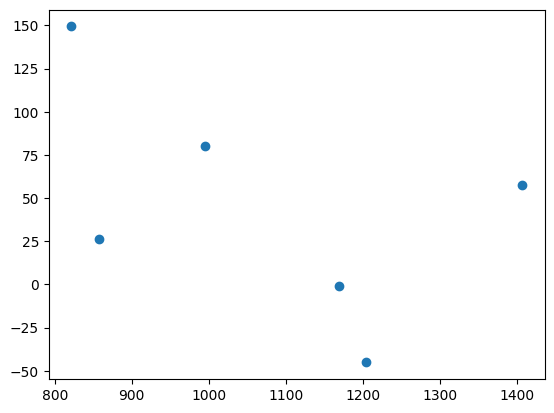

In [81]:
#scatter plot wrt residuals and predictions
plt.scatter(y_pred, residuals)

## USING OLS

In [82]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(prediction)


[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [83]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 13 Nov 2024   Prob (F-statistic):                       0.754
Time:                        23:59:06   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/kritika/Desktop/Codes/ML/Basics/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
